The aim of this project is to accurately predict each patient's length of stay, enabling hospitals to optimize their functionality and resources. I will first import the training and test datasets, perform some data cleaning and EDA for the two datasets, conduct feature engineering, and create an XG Boost as well as a Naive Bayes model to predict these stay lengths. I will finally compare the accuracies of both models. I'm using an XG Boost model because it's a classification model that works well when there are a lot of data entries as well as a mixutre of categorical and numerical variables in the dataset. Finally, I'm using a Naive Bayes model because it's also an effective classification model that is relatively fast to implement.

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
warnings.filterwarnings('ignore')

**Importing the Datasets**

In [55]:
path1 = "/content/drive/MyDrive/train.csv"
train = pd.read_csv(path1)

In [56]:
path2 = "/content/drive/MyDrive/test.csv"
test = pd.read_csv(path2)

**Dataset Overview and Cleaning**

In [57]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [60]:
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [61]:
# NA values in train dataset
train.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    4532
Bed Grade                             113
Hospital_code                           0
Admission_Deposit                       0
Age                                     0
Visitors with Patient                   0
Severity of Illness                     0
Type of Admission                       0
patientid                               0
case_id                                 0
Ward_Facility_Code                      0
Ward_Type                               0
Department                              0
Available Extra Rooms in Hospital       0
Hospital_region_code                    0
City_Code_Hospital                      0
Hospital_type_code                      0
Stay                                    0
dtype: int64

In [62]:
# NA values in test dataset
test.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    2157
Bed Grade                              35
case_id                                 0
Age                                     0
Visitors with Patient                   0
Severity of Illness                     0
Type of Admission                       0
patientid                               0
Ward_Facility_Code                      0
Hospital_code                           0
Ward_Type                               0
Department                              0
Available Extra Rooms in Hospital       0
Hospital_region_code                    0
City_Code_Hospital                      0
Hospital_type_code                      0
Admission_Deposit                       0
dtype: int64

In [63]:
#Training Set Dimensions
train.shape

(318438, 18)

In [64]:
#Test Set Dimensions
test.shape

(137057, 17)

In [65]:
#Unique entries in the training dataset
for column in train.columns:
    print(f"{column}: {train[column].nunique()}")

case_id: 318438
Hospital_code: 32
Hospital_type_code: 7
City_Code_Hospital: 11
Hospital_region_code: 3
Available Extra Rooms in Hospital: 18
Department: 5
Ward_Type: 6
Ward_Facility_Code: 6
Bed Grade: 4
patientid: 92017
City_Code_Patient: 37
Type of Admission: 3
Severity of Illness: 3
Visitors with Patient: 28
Age: 10
Admission_Deposit: 7300
Stay: 11


In [66]:
#Unique entries in the test dataset
for column in test.columns:
    print(f"{column}: {test[column].nunique()}")

case_id: 137057
Hospital_code: 32
Hospital_type_code: 7
City_Code_Hospital: 11
Hospital_region_code: 3
Available Extra Rooms in Hospital: 15
Department: 5
Ward_Type: 6
Ward_Facility_Code: 6
Bed Grade: 4
patientid: 39607
City_Code_Patient: 37
Type of Admission: 3
Severity of Illness: 3
Visitors with Patient: 27
Age: 10
Admission_Deposit: 6609


**Univariate Analysis of the Datasets**

Training Dataset

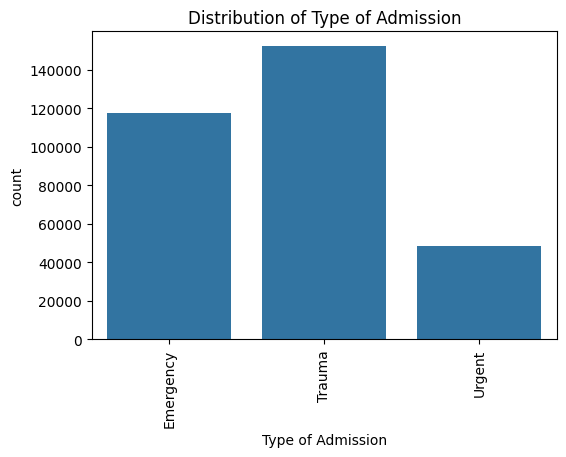

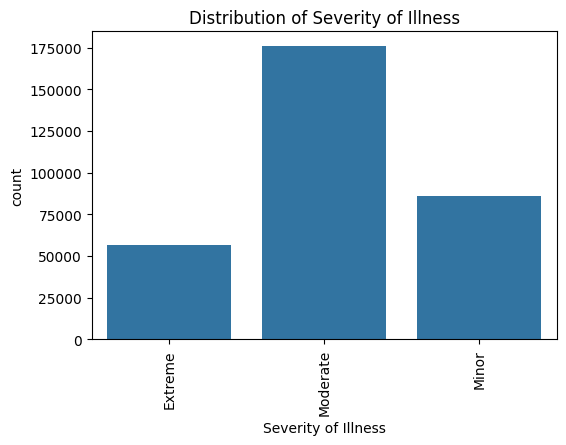

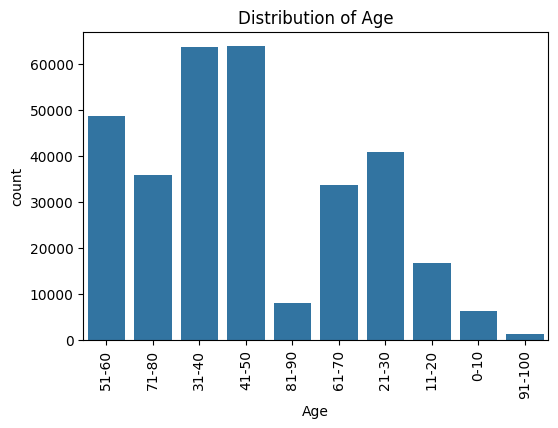

In [67]:
columns1 = ['Type of Admission', 'Severity of Illness', 'Age']

# Plotting distributions for each column
for column in columns1:
    plt.figure(figsize=(6, 4))
    if train[column].dtype == 'object':
        sns.countplot(data=train, x=column)
        plt.xticks(rotation=90)
    else:
        sns.histplot(data=train, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Test Dataset

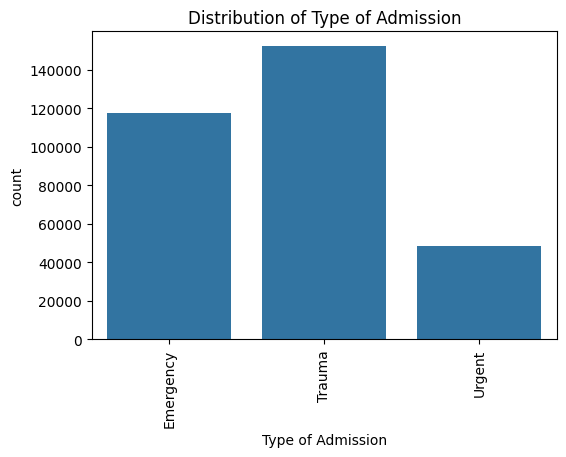

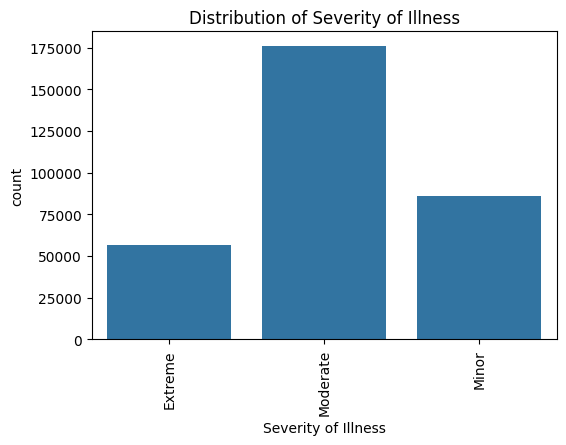

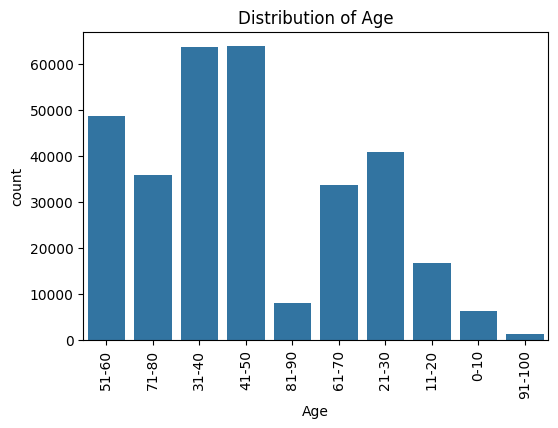

In [68]:
columns2 = ['Type of Admission', 'Severity of Illness', 'Age']

# Plotting distributions for each column
for column in columns2:
    plt.figure(figsize=(6, 4))
    if test[column].dtype == 'object':
        sns.countplot(data=train, x=column)
        plt.xticks(rotation=90)
    else:
        sns.histplot(data=train, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

The test dataset appears to be representative of the training dataset.

**Bivaraite Analysis with 'Stay' as the Target Variable**

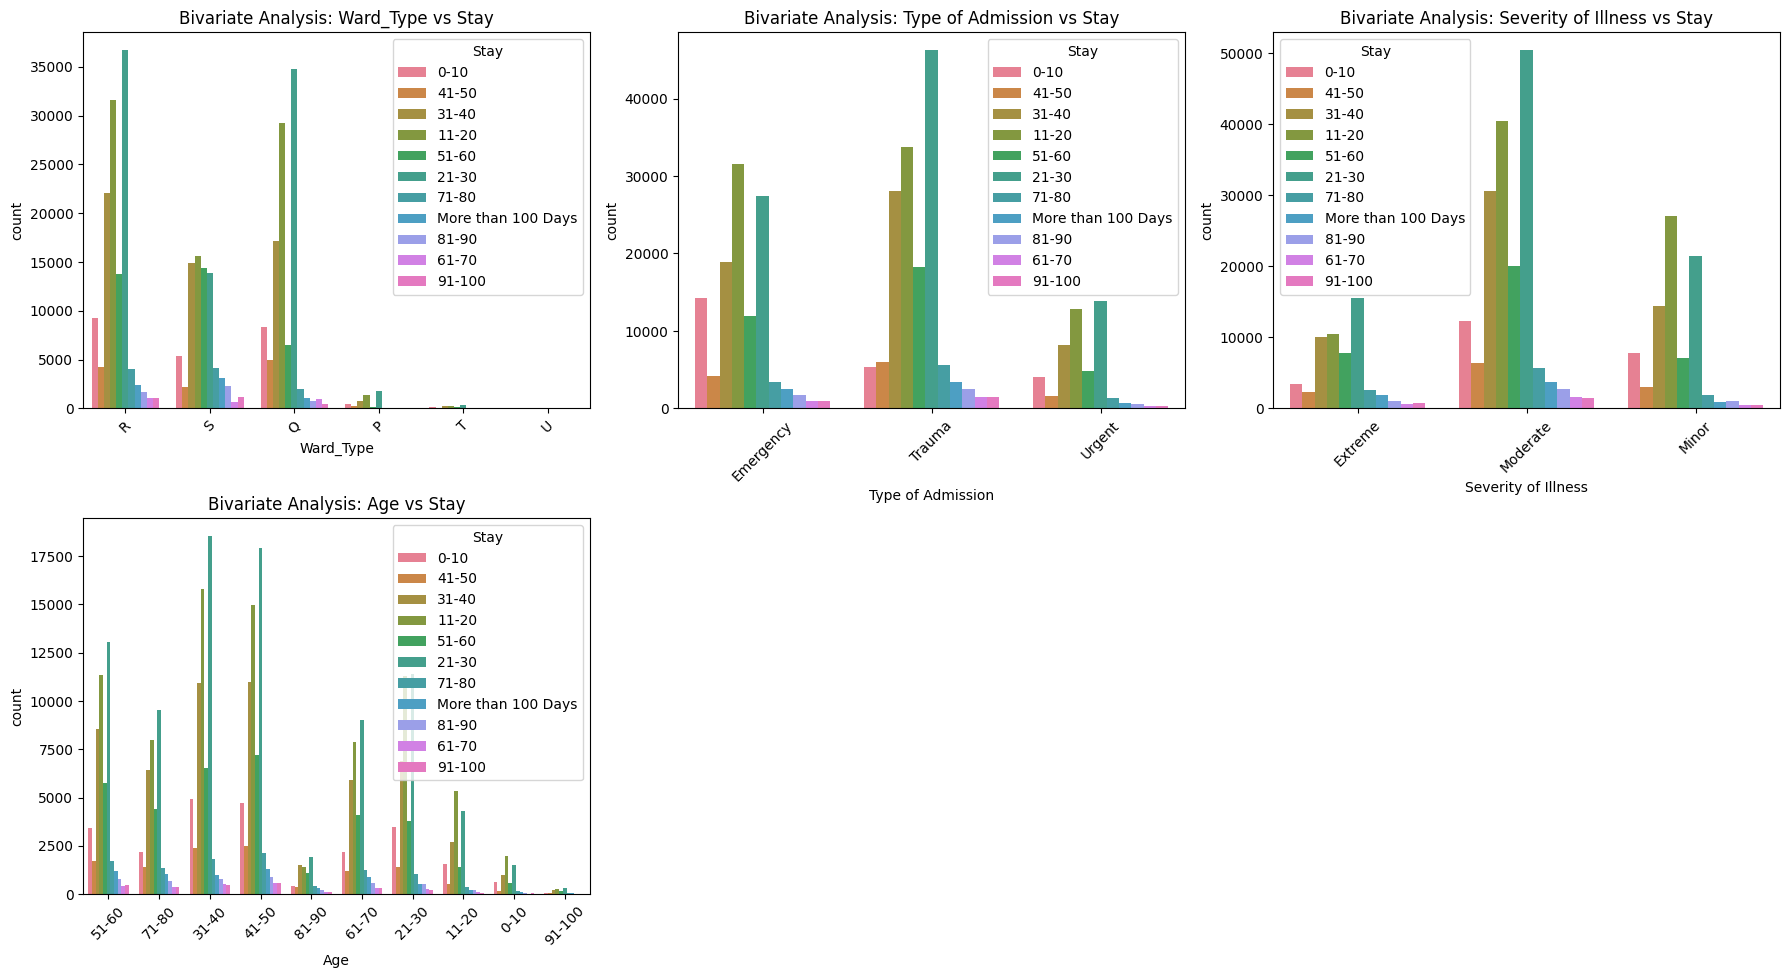

In [69]:
# List of columns to analyze bivariately with 'Stay'
columns_to_analyze = ['Ward_Type', 'Type of Admission', 'Severity of Illness', 'Age']

# Setting figure size and iterating through each column for analysis
plt.figure(figsize=(18, 14))
for i, col in enumerate(columns_to_analyze, 1):
    plt.subplot(3, 3, i)
    if train[col].dtype == 'object':
        sns.countplot(data=train, x=col, hue='Stay')
        plt.xticks(rotation=45)
    else:
        sns.boxplot(data=train, x='Stay', y=col)
    plt.title(f'Bivariate Analysis: {col} vs Stay')
    plt.tight_layout()

plt.show()

In [70]:
# Filling missing values in the 'Bed Grade' column for both Train and Test datasets
bed_grade_mode = train['Bed Grade'].mode()[0]
train['Bed Grade'].fillna(bed_grade_mode, inplace=True)
test['Bed Grade'].fillna(bed_grade_mode, inplace=True)

In [71]:
# Filling missing values in the 'City Code Patient' column for both Train and Test datasets
bed_grade_mode = train['City_Code_Patient'].mode()[0]
train['City_Code_Patient'].fillna(bed_grade_mode, inplace=True)
test['City_Code_Patient'].fillna(bed_grade_mode, inplace=True)

In [72]:
from sklearn.preprocessing import LabelEncoder

def label_encode_column(df, column_name):
    """
    Encodes the specified column in the dataframe using label encoding.

    """
    le = LabelEncoder()
    df[column_name] = le.fit_transform(df[column_name].astype('str'))
    return df

# Apply the function to the 'Stay' column in the training dataset
train = label_encode_column(train, 'Stay')
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4


In [73]:
# Imputing dummy Stay column in test dataset and concatenating with train dataset
df = pd.concat([train, test.assign(Stay=-1)])
df.reset_index(drop=True, inplace=True)  # Resetting index after concatenation

In [74]:
columns_to_encode = ['Hospital_type_code', 'Hospital_region_code', 'Department',
                     'Ward_Type', 'Ward_Facility_Code', 'Type of Admission',
                     'Severity of Illness', 'Age']

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to all specified columns in train and test datasets
df[columns_to_encode] = df[columns_to_encode].apply(lambda x: le.fit_transform(x.astype(str)))

In [75]:
# Separating Train and Test Datasets
train = df[df['Stay'] != -1]
test = df[df['Stay'] == -1]

**Feature Engineering**

In [76]:
def get_countid_encode(train, test, cols, name):
    # Helper function to group by specified columns and count occurrences
    def get_group_count(df, cols, name):
        return df.groupby(cols)['case_id'].count().reset_index().rename(columns={'case_id': name})

    # Helper function to merge count results and fill missing values
    def merge_and_fillna(df, temp, cols, name):
        df = pd.merge(df, temp, how='left', on=cols)  # Merge with the count dataframe
        df[name] = df[name].astype('float')  # Convert the count column to float
        df[name].fillna(np.median(temp[name]), inplace=True)  # Fill missing values with median
        return df

    # Generate counts for the training and testing data
    train_temp = get_group_count(train, cols, name)
    test_temp = get_group_count(test, cols, name)

    # Merge counts and handle missing values for both datasets
    train = merge_and_fillna(train, train_temp, cols, name)
    test = merge_and_fillna(test, test_temp, cols, name)

    return train, test  # Return the updated train and test dataframes

In [77]:
# List of tuples containing columns to group by and the new column name for counts
columns_list = [
    (['patientid'], 'count_id_patient'),
    (['patientid', 'Hospital_region_code'], 'count_id_patient_hospitalCode'),
    (['patientid', 'Ward_Facility_Code'], 'count_id_patient_wardfacilityCode')
]

# Loop through each set of columns and new column name
for cols, name in columns_list:
    # Apply the get_countid_encode function to both train and test datasets
    train, test = get_countid_encode(train, test, cols, name)

In [78]:
test1 = test.drop(['patientid', 'Stay', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)
train1 = train.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

In [79]:
from sklearn.model_selection import train_test_split
# Function to split the dataframe into training and testing sets
def split_data(df, target_column, test_size=0.20, random_state=100):
    # Drop the target column to create the feature set (X)
    X = df.drop(target_column, axis=1)
    # Extract the target column to create the target set (y)
    y = df[target_column]
    # Split the feature set and target set into training and testing subsets
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Split the train1 dataframe into training and testing sets
X_train, X_test, y_train, y_test = split_data(train1, 'Stay')

**XG Boost Model**

In [80]:
import xgboost
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier with specific hyperparameters
# max_depth: Maximum depth of a tree
# learning_rate: Step size shrinkage to prevent overfitting
# n_estimators: Number of trees to fit
# objective: Specifies the learning task and the corresponding learning objective
# reg_alpha: L1 regularization term on weights
# reg_lambda: L2 regularization term on weights
# booster: Booster to use ('gbtree', 'gblinear' or 'dart')
# n_jobs: Number of parallel threads used to run XGBoost
# min_child_weight: Minimum sum of instance weight (hessian) needed in a child
# base_score: The initial prediction score of all instances, global bias
classifier_xgb = xgboost.XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=800,
    objective='multi:softmax',
    reg_alpha=0.5,
    reg_lambda=1.5,
    booster='gbtree',
    n_jobs=4,
    min_child_weight=2,
    base_score=0.75
)

# Train the XGBoost model on the training data
# The fit method trains the model using the training data (X_train) and corresponding labels (y_train)
model_xgb = classifier_xgb.fit(X_train, y_train)

# Predict the labels on the test data
# The predict method uses the trained model to predict labels for the test data (X_test)
prediction_xgb = model_xgb.predict(X_test)

# Calculate the accuracy score of the predictions
# accuracy_score compares the predicted labels (prediction_xgb) with the true labels (y_test) and calculates the accuracy
acc_score_xgb = accuracy_score(prediction_xgb, y_test)

# Print the accuracy score
# The accuracy score is multiplied by 100 to convert it to a percentage
print("Accuracy:", acc_score_xgb * 100)

Accuracy: 43.030084160281376


**Naive Bayes Model**

In [81]:
from sklearn.naive_bayes import GaussianNB

# Extract the target values from y_train
# The values attribute is used to extract the underlying numpy array of the target variable y_train
target = y_train.values

# Define the features as the X_train data
# The features are the input data used to train the model
features = X_train

# Initialize the Gaussian Naive Bayes classifier
# GaussianNB is a type of Naive Bayes classifier that assumes the features follow a Gaussian distribution
classifier_nb = GaussianNB()

# Train the Gaussian Naive Bayes model
# The fit method trains the model using the features and target values
model_nb = classifier_nb.fit(features, target)

In [82]:
# Predict the labels on the test data
# The predict method uses the trained Naive Bayes model (model_nb) to predict the labels for the test data (X_test)
prediction_nb = model_nb.predict(X_test)

# Import the accuracy_score function from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate the accuracy score of the predictions
# accuracy_score compares the predicted labels (prediction_nb) with the true labels (y_test) and calculates the accuracy
acc_score_nb = accuracy_score(prediction_nb, y_test)

# Print the accuracy score
# The accuracy score is multiplied by 100 to convert it to a percentage
print("Accuracy:", acc_score_nb * 100)

Accuracy: 34.55439015199096


**Predictions**

In [83]:
# Naive Bayes predictions
pred_nb = classifier_nb.predict(test1.iloc[:, 1:])

# Create a DataFrame to store the predictions
result_nb = pd.DataFrame(pred_nb, columns=['Stay'])

# Add the 'case_id' column from the test1 DataFrame to the result DataFrame
result_nb['case_id'] = test1['case_id']

# Reorder the columns to ensure 'case_id' is the first column
result_nb = result_nb[['case_id', 'Stay']]

In [84]:
# Replace numerical predictions with categorical stay ranges
# This line replaces the numerical values in the 'Stay' column with corresponding categorical stay ranges.
# The replacement is done using a dictionary where keys are numerical predictions and values are the stay ranges.
result_nb['Stay'] = result_nb['Stay'].replace({
    0: '0-10',
    1: '11-20',
    2: '21-30',
    3: '31-40',
    4: '41-50',
    5: '51-60',
    6: '61-70',
    7: '71-80',
    8: '81-90',
    9: '91-100',
    10: 'More than 100 Days'
})

result_nb.head()

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,31-40


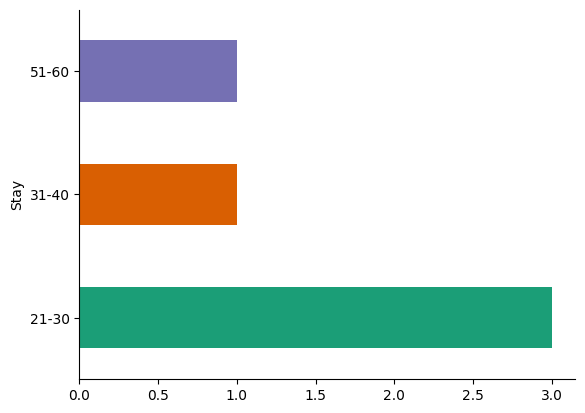

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Stay').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [86]:
#XG Boost Model Predictions
pred_xgb = classifier_xgb.predict(test1.iloc[:, 1:])
result_xgb = pd.DataFrame(pred_xgb, columns=['Stay'])
result_xgb['case_id'] = test1['case_id']
result_xgb = result_xgb[['case_id', 'Stay']]

In [87]:
result_xgb['Stay'] = result_xgb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_xgb.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


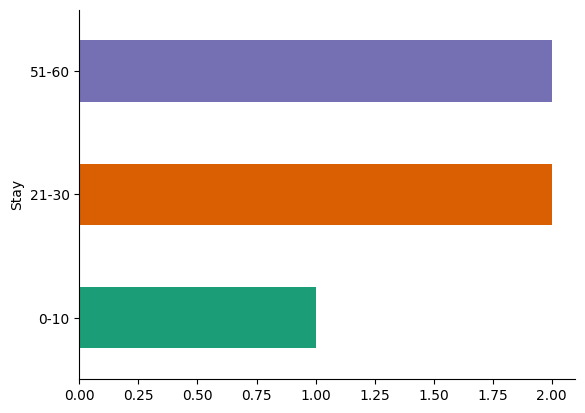

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('Stay').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Results**

In [89]:
# Naive Bayes
print(result_nb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   2598
11-20                 26827
21-30                 72206
31-40                 15639
41-50                   469
51-60                 13651
61-70                    92
71-80                   955
81-90                   296
91-100                    2
More than 100 Days     4322
Name: case_id, dtype: int64


In [90]:
# XGBoost
print(result_xgb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   4462
11-20                 39080
21-30                 58320
31-40                 12554
41-50                    60
51-60                 18900
61-70                    12
71-80                   297
81-90                  1112
91-100                   70
More than 100 Days     2190
Name: case_id, dtype: int64


In the end, the XG Boost model outperformed the Naive Bayes model in terms of accuracy (43% vs. ~35%). However, both models had low accuracies, which might have occured because there wasn't enough data. Nevertheless, both models predicted that most patients will stay at a hospital between 21-30 days. Furthermore, the models predicted that very few people stay between 91-100 days.